# Chapter2 - Exercise
# Applied

In [88]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline
plt.style.use('seaborn-white')

## 2-8

In [3]:
# Exercise 2-8
college = pd.read_csv('../Data/College.csv')

In [4]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
college = college.rename(columns={'Unnamed: 0':'Name'}).set_index('Name')

In [6]:
# (c)-i
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


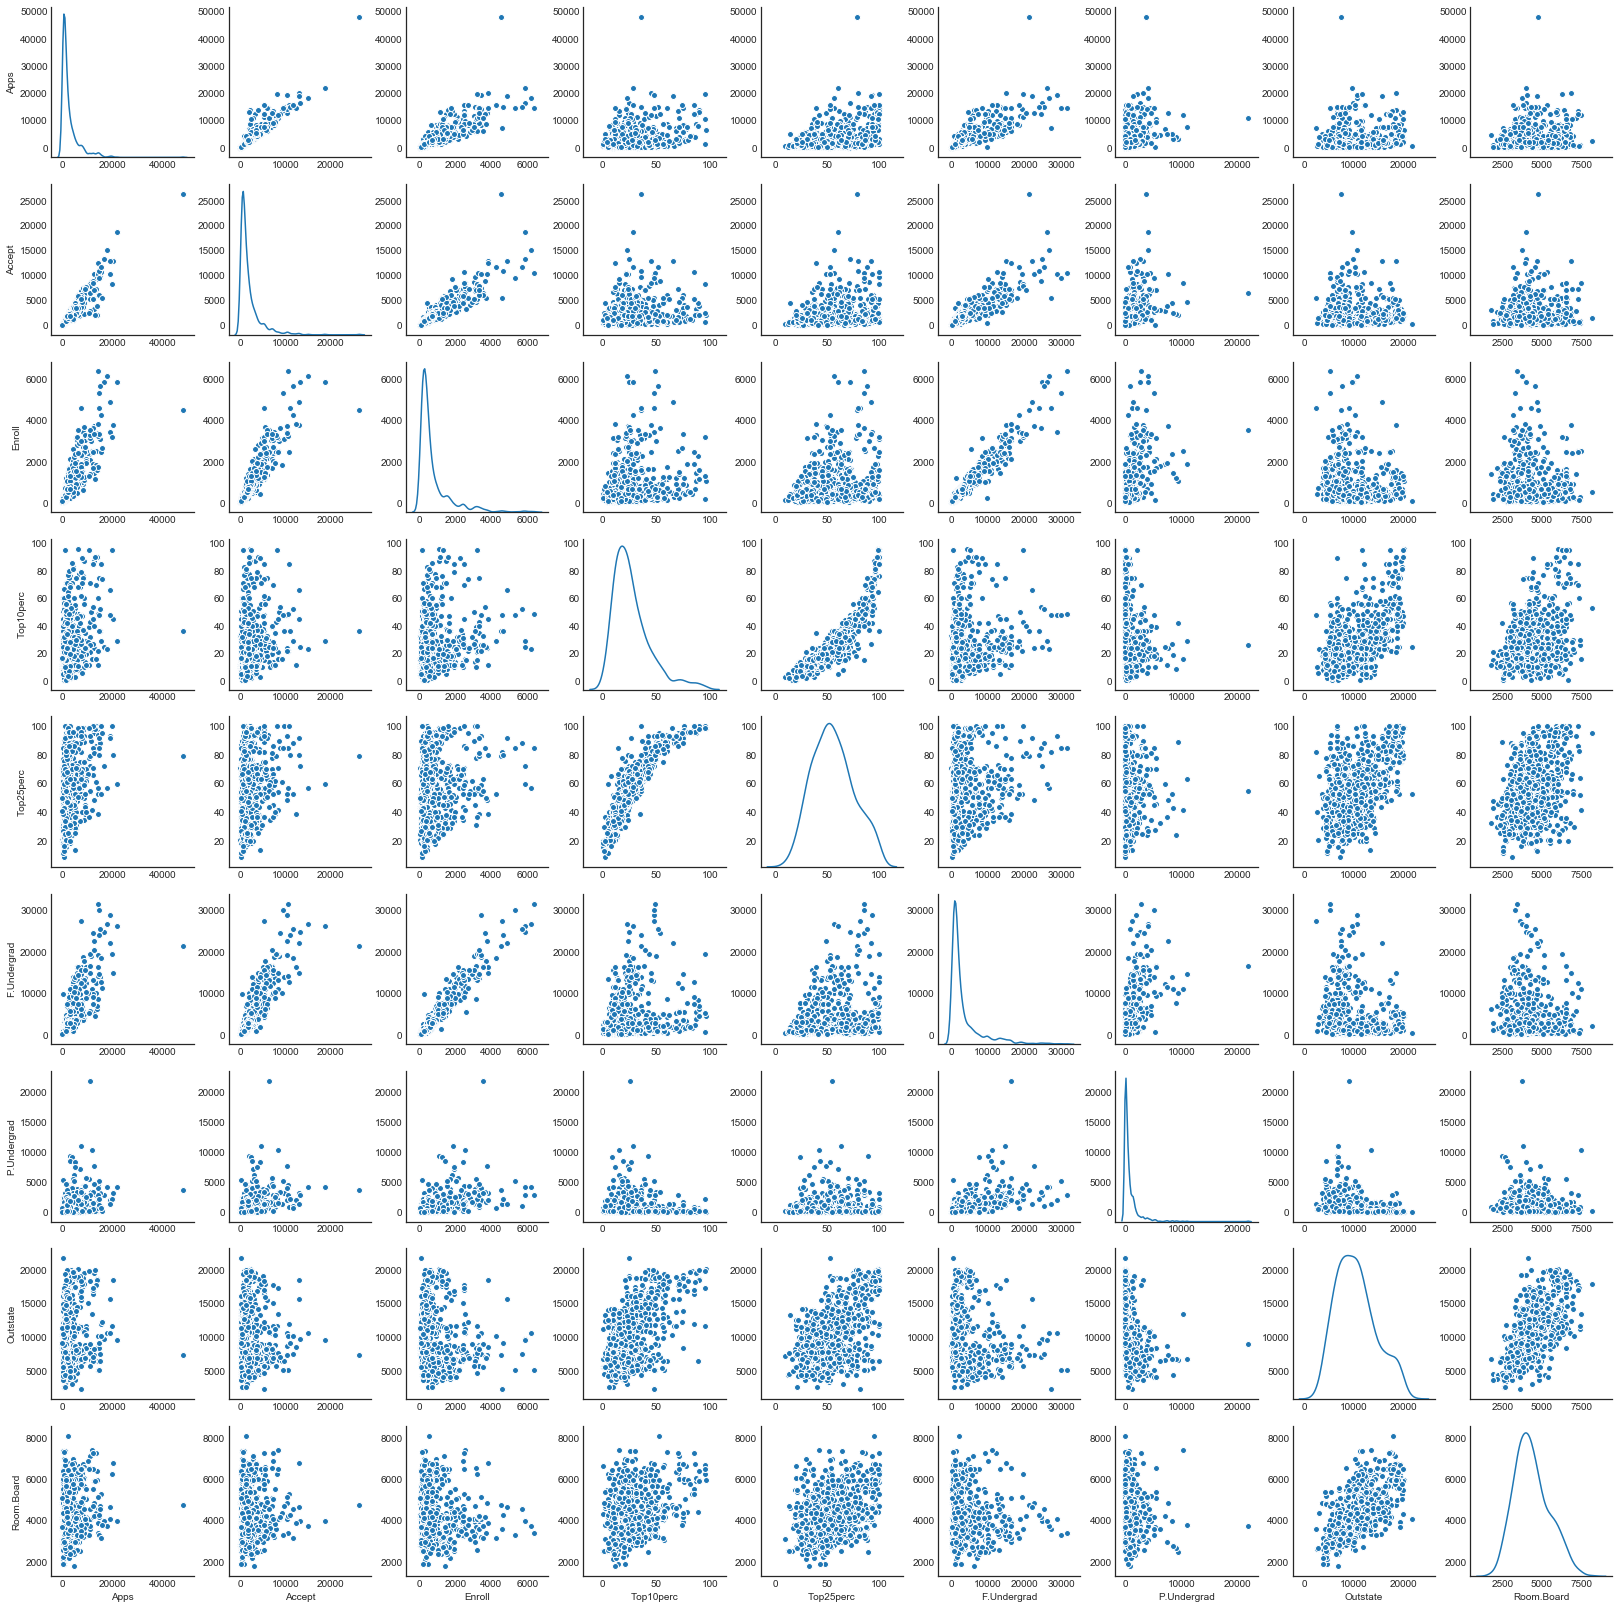

In [7]:
# (c)-ii
sns.pairplot(college.iloc[:,:10], diag_kind='kde')

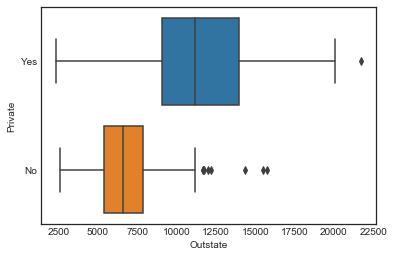

In [8]:
# (c)-iii
sns.boxplot(x='Outstate', y='Private', data = college)

In [9]:
# (c)-iv
college['Elite'] = np.where(college['Top10perc']>50,"Yes","No")

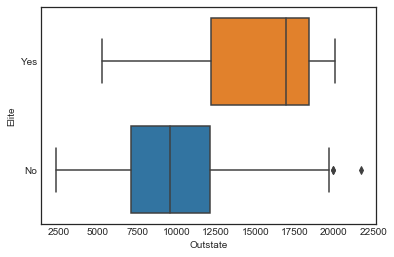

In [10]:
ax = sns.boxplot(x='Outstate', y='Elite', data=college)
ax.invert_yaxis()

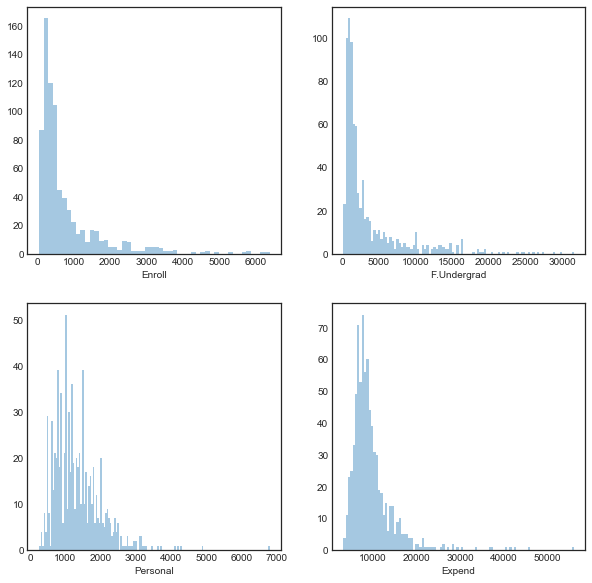

In [11]:
# (c)-v
fig, axes = plt.subplots(2, 2, figsize=(10,10))
sns.distplot(college['Enroll'], hist=True, kde=False, bins=50, ax=axes[0][0])
sns.distplot(college['F.Undergrad'], hist=True, kde=False, bins=100, ax=axes[0][1])
sns.distplot(college['Personal'], hist=True, kde=False, bins=150, ax=axes[1][0])
sns.distplot(college['Expend'], hist=True, kde=False, bins=100, ax=axes[1][1])


In [12]:
# Exercise 2-9
auto = pd.read_csv('../Data/Auto.csv',na_values=['?']).dropna()

In [13]:
#(a)
auto.head(5)
# Quantitative: cylinders, origin, name
# Qualititative: other ones. 
# cylinders could be quantitative.

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [14]:
#(b)
auto_quant = auto.drop(['origin', 'name', 'cylinders'], axis=1)
auto_quant.agg(['min','max'])

,mpg,displacement,horsepower,weight,acceleration,year
min,9.0,68.0,46.0,1613,8.0,70
max,46.6,455.0,230.0,5140,24.8,82


In [15]:
#(c)
auto_quant.agg(['mean','std'])

,mpg,displacement,horsepower,weight,acceleration,year
mean,23.445918,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,104.644004,38.491160,849.402560,2.758864,3.683737


In [16]:
#(d)
auto_quant.drop(range(10,85), errors='ignore').agg(['mean','std'])

,mpg,displacement,horsepower,weight,acceleration,year
mean,24.338994,188.389937,101.235849,2942.506289,15.695597,77.110063
std,7.885977,100.424205,36.185088,812.971260,2.719850,3.130771


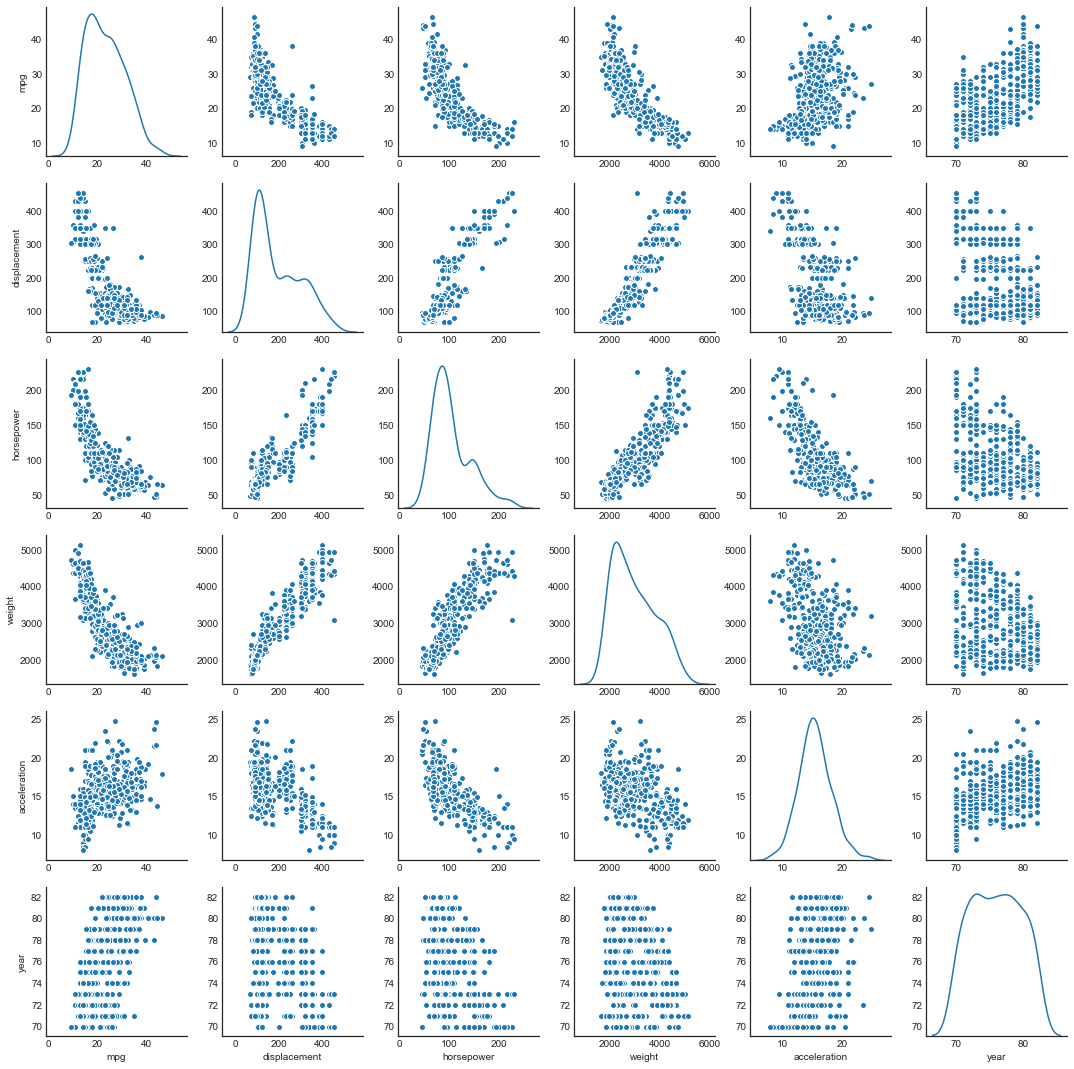

In [17]:
#(e) 
sns.pairplot(auto_quant, diag_kind='kde')

In [18]:
#(f)
# Yes. There are relationships between mpg and other variables.

In [27]:
# Exercise 2-10
boston = pd.read_csv('../Data/Boston.csv')
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
#(a)
boston.shape
# You can see that there are 506 rows and 14 columns.

(506, 14)

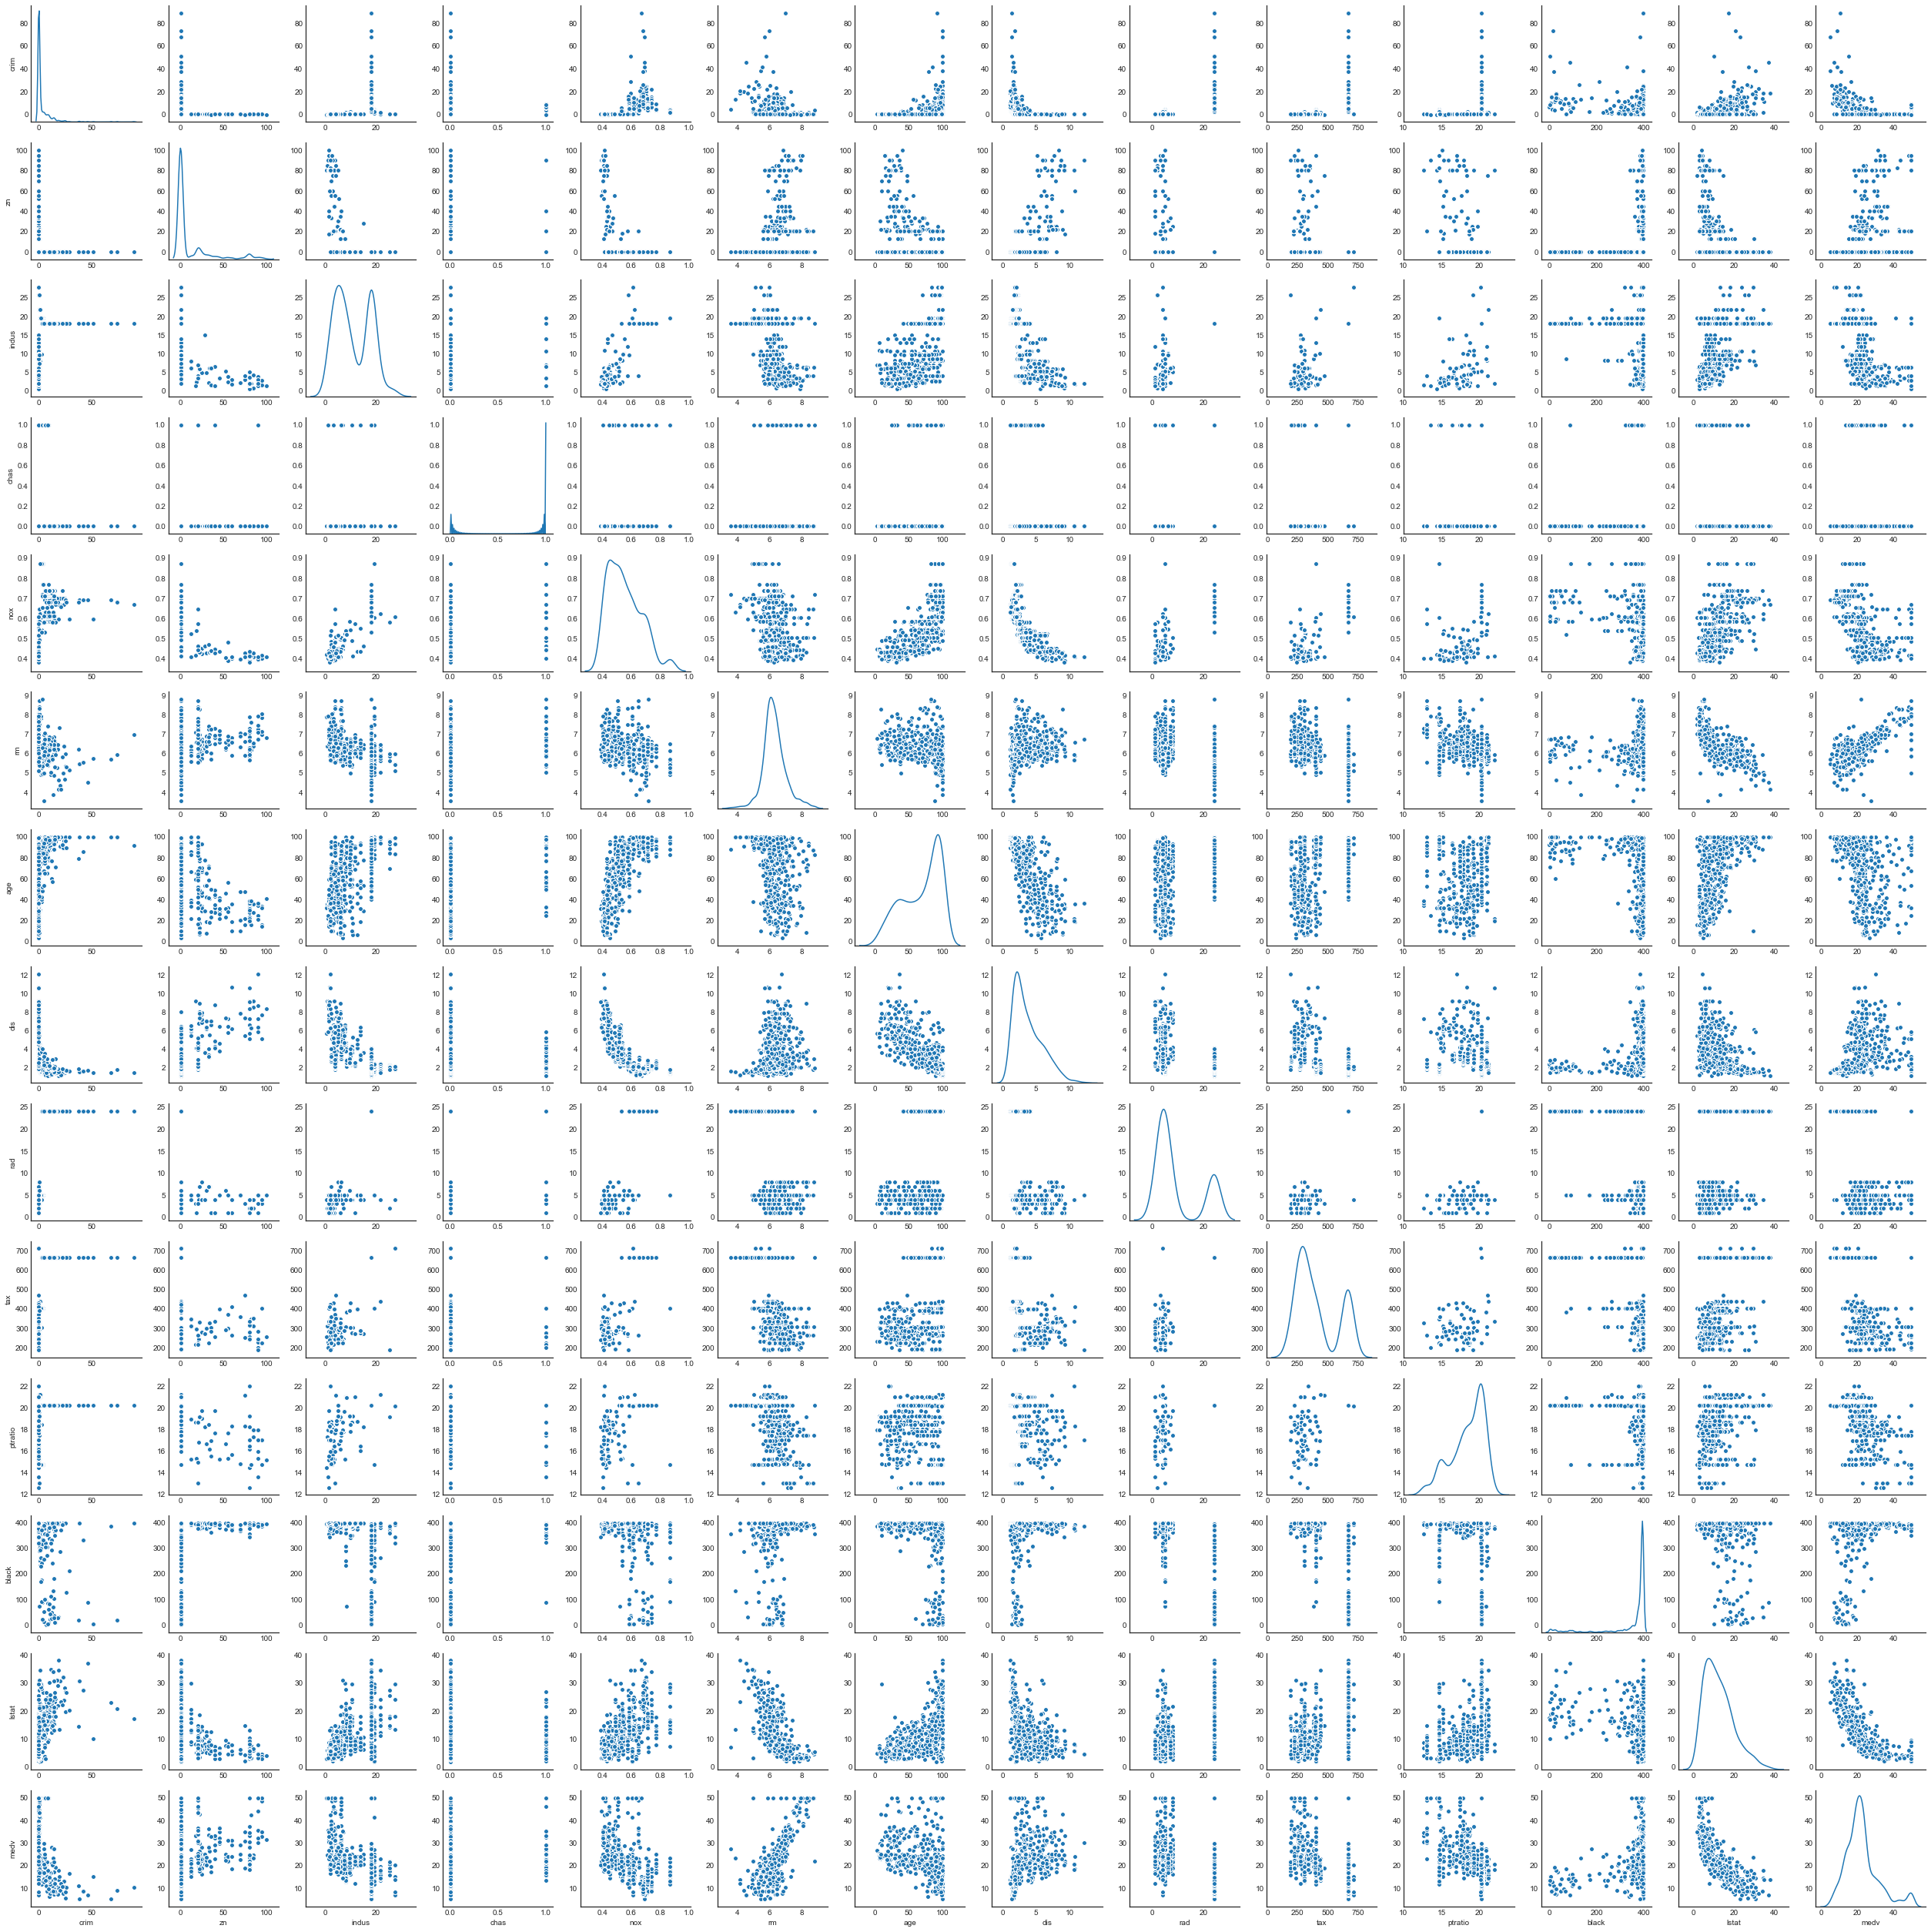

In [28]:
#(b)
sns.pairplot(boston, diag_kind='kde')
# There are so many columns that you should choose some of them
# And observe the relationship between them.

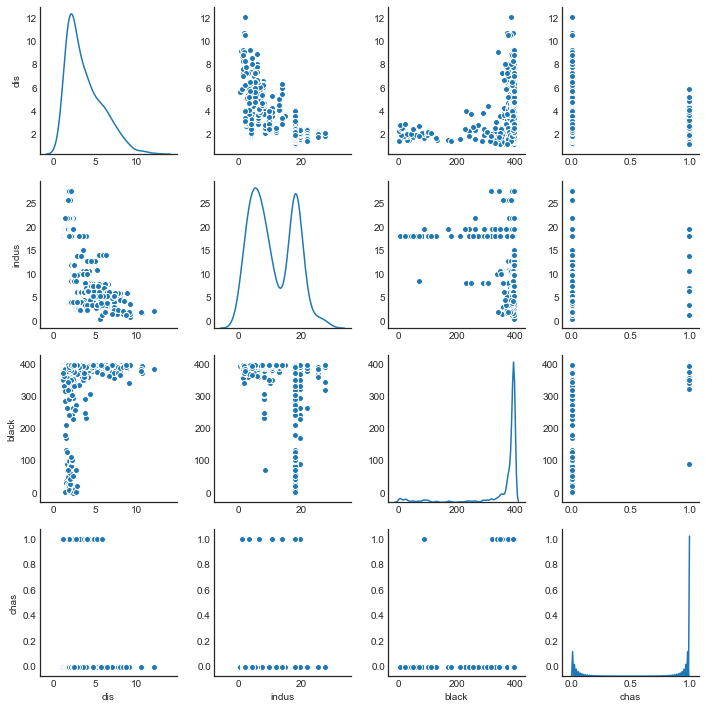

In [48]:
# So i selected a few variables randomly
import math
rand_boston = boston.iloc[:,[math.floor(num) for num in np.random.rand(4)*14]]
sns.pairplot(rand_boston, diag_kind='kde')

In [51]:
#(c)
# You can use pairplot or correlation.
boston.agg('corr')['crim']

crim       1.000000
zn        -0.200469
indus      0.406583
chas      -0.055892
nox        0.420972
rm        -0.219247
age        0.352734
dis       -0.379670
rad        0.625505
tax        0.582764
ptratio    0.289946
black     -0.385064
lstat      0.455621
medv      -0.388305
Name: crim, dtype: float64

In [80]:
#(d)
from scipy import stats
def outlier(col):
    return col[np.abs(stats.zscore(col))>2]
boston[['crim','tax','ptratio']].apply(outlier)

,crim,tax,ptratio
196,NaN,NaN,12.6
197,NaN,NaN,12.6
198,NaN,NaN,12.6
257,NaN,NaN,13.0
258,NaN,NaN,13.0
259,NaN,NaN,13.0
260,NaN,NaN,13.0
261,NaN,NaN,13.0
262,NaN,NaN,13.0
263,NaN,NaN,13.0


(10, 30)

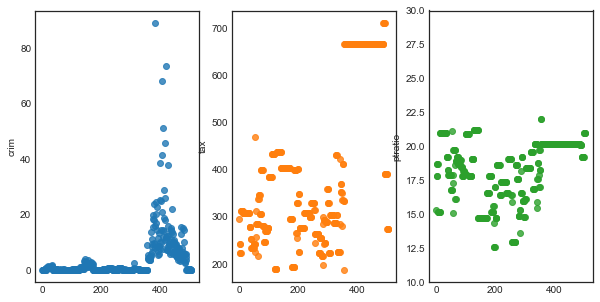

In [112]:
#(d)
# You can skim scatterplots of them.
fig, axes = plt.subplots(1,3, figsize=(10,5))
sns.regplot(x=np.arange(boston.shape[0]),y=boston['crim'],
            fit_reg=False, ax=axes[0])
sns.regplot(x=np.arange(boston.shape[0]),y=boston['tax'],
            fit_reg=False, ax=axes[1])
sns.regplot(x=np.arange(boston.shape[0]),y=boston['ptratio'],
            fit_reg=False, ax=axes[2])
axes[2].set_ylim([10,30])

In [102]:
# Or, you can see their z-value
def outlier(col):
    return col[np.abs(stats.zscore(col))>3]
boston[['crim','tax','ptratio']].apply(outlier)

,crim,tax,ptratio
380,88.9762,NaN,NaN
398,38.3518,NaN,NaN
404,41.5292,NaN,NaN
405,67.9208,NaN,NaN
410,51.1358,NaN,NaN
414,45.7461,NaN,NaN
418,73.5341,NaN,NaN
427,37.6619,NaN,NaN


In [116]:
#(e)
boston['chas'].value_counts()
# 35 suburbs.

0    471
1     35
Name: chas, dtype: int64

In [117]:
#(f)
boston['ptratio'].median()

19.05

In [122]:
#(g)
boston[boston['medv']==boston['medv'].min()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [148]:
boston.apply(Series.quantile,args=[[0.25,0.5,0.75]])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.25,0.082045,0.0,5.19,0.0,0.449,5.8855,45.025,2.100175,4.0,279.0,17.40,375.3775,6.950,17.025
0.50,0.256510,0.0,9.69,0.0,0.538,6.2085,77.500,3.207450,5.0,330.0,19.05,391.4400,11.360,21.200
0.75,3.677082,12.5,18.10,0.0,0.624,6.6235,94.075,5.188425,24.0,666.0,20.20,396.2250,16.955,25.000


In [153]:
#(h)
boston[boston['rm']>7].shape

(64, 14)

In [155]:
boston[boston['rm']>8].shape

(13, 14)

In [160]:
# Compare statistics between groups with rm>8 and rm<=8
boston.groupby(boston['rm']>8).apply(DataFrame.describe)

crim          zn       indus        chas         nox  \
rm                                                                        
False count  493.000000  493.000000  493.000000  493.000000  493.000000   
      mean     3.689855   11.304260   11.243793    0.066937    0.555103   
      std      8.700255   23.265932    6.866735    0.250167    0.116481   
      min      0.006320    0.000000    0.460000    0.000000    0.385000   
      25%      0.080140    0.000000    5.190000    0.000000    0.449000   
      50%      0.245220    0.000000    9.690000    0.000000    0.538000   
      75%      3.774980   12.500000   18.100000    0.000000    0.624000   
      max     88.976200  100.000000   27.740000    1.000000    0.871000   
True  count   13.000000   13.000000   13.000000   13.000000   13.000000   
      mean     0.718795   13.615385    7.078462    0.153846    0.539238   
      std      0.901640   26.298094    5.392767    0.375534    0.092352   
      min      0.020090    0.000000    2.680000    0.000000    0.416100   
      25%      0.331470    0.000000    3.970000    0.000000    0.504000   
      50%      0.520140    0.000000    6.200000    0.000000    0.507000   
      75%      0.578340   20.000000    6.200000    0.000000    0.605000   
      max      3.474280   95.000000   19.580000    1.000000    0.718000   

                     rm         age         dis         rad         tax  \
rm                                                                        
False count  493.000000  493.000000  493.000000  493.000000  493.000000   
      mean     6.230211   68.496755    3.804663    9.604462  410.430020   
      std      0.624223   28.253956    2.112107    8.775413  169.314464   
      min      3.561000    2.900000    1.129600    1.000000  187.000000   
      25%      5.879000   44.400000    2.088200    4.000000  280.000000   
      50%      6.185000   77.300000    3.215700    5.000000  334.000000   
      75%      6.575000   94.300000    5.214600   24.000000  666.000000   
      max      7.929000  100.000000   12.126500   24.000000  711.000000   
True  count   13.000000   13.000000   13.000000   13.000000   13.000000   
      mean     8.348538   71.538462    3.430192    7.461538  325.076923   
      std      0.251261   24.608723    1.883955    5.332532  110.971063   
      min      8.034000    8.400000    1.801000    2.000000  224.000000   
      25%      8.247000   70.400000    2.288500    5.000000  264.000000   
      50%      8.297000   78.300000    2.894400    7.000000  307.000000   
      75%      8.398000   86.500000    3.651900    8.000000  307.000000   
      max      8.780000   93.900000    8.906700   24.000000  666.000000   

                ptratio       black       lstat        medv  
rm                                                           
False count  493.000000  493.000000  493.000000  493.000000  
      mean    18.510751  355.921542   12.873063   21.961460  
      std      2.133117   92.359032    7.099892    8.514269  
      min     12.600000    0.320000    1.730000    5.000000  
      25%     17.400000  374.710000    7.340000   16.700000  
      50%     19.100000  391.830000   11.650000   21.000000  
      75%     20.200000  396.240000   17.110000   24.800000  
      max     22.000000  396.900000   37.970000   50.000000  
True  count   13.000000   13.000000   13.000000   13.000000  
      mean    16.361538  385.210769    4.310000   44.200000  
      std      2.410580   10.529359    1.373566    8.092383  
      min     13.000000  354.550000    2.470000   21.900000  
      25%     14.700000  384.540000    3.320000   41.700000  
      50%     17.400000  386.860000    4.140000   48.300000  
      75%     17.400000  389.700000    5.120000   50.000000  
      max     20.200000  396.900000    7.440000   50.000000